# Count models

This notebook generates the figures for the count models in the slide deck. It uses data from the [2017 NHTS](https://nhts.ornl.gov).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.colors
import math
import scipy.special

In [2]:
hh17 = pd.read_csv('../data/hhpub.csv')

In [3]:
hh17['income_midpoint'] = hh17.HHFAMINC.map({
    -7: np.nan,
    -8: np.nan,
    -9: np.nan,
    1: 5000,
    2: 12500,
    3: 20000,
    4: 30000,
    5: 42500,
    6: 62500,
    7: 87500,
    8: 112500,
    9: 137500,
    10: 175000,
    11: 225000
})

In [4]:
hh17 = hh17.dropna(subset=['income_midpoint'])

In [5]:
trips17 = pd.read_csv('../data/trippub.csv')

In [6]:
hh17 = hh17.set_index('HOUSEID')

In [7]:
# number of car trips on travel day
hh17['nCarTrips'] = trips17[trips17.TRPTRANS.isin([3, 4, 5, 6])].groupby('HOUSEID').size().reindex(hh17.index).fillna(0)

In [8]:
# first a linear regression
ols = sm.OLS(hh17.nCarTrips, sm.add_constant(hh17[['HBPPOPDN']] / 1000))
fit = ols.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nCarTrips   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1203.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):          2.27e-262
Time:                        14:47:11   Log-Likelihood:            -3.8928e+05
No. Observations:              125320   AIC:                         7.786e+05
Df Residuals:                  125318   BIC:                         7.786e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5607      0.019    347.343      0.000       6.524       6.598
HBPPOPDN      -0.0946      0.003    -34.686      0.000      -0.100      -0.089
==============================================================================
Omnibus:                    45049.896   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216122.685
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       8.469   Cond. No.                         8.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

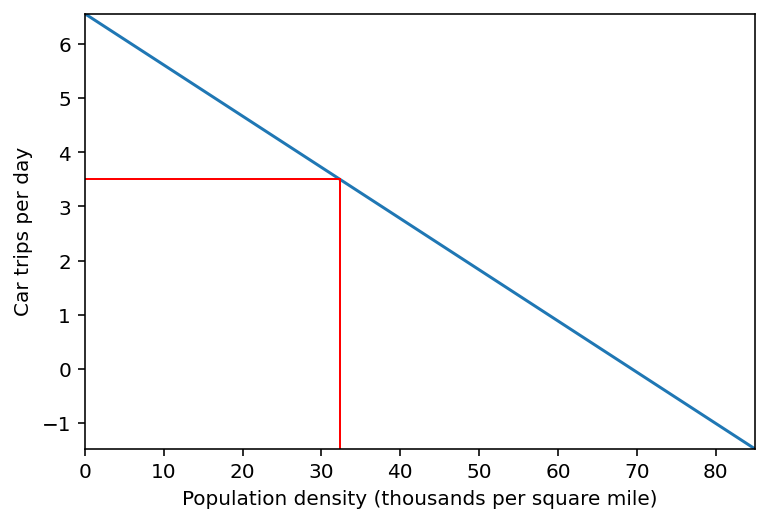

In [9]:
maxX = -(fit.params.const  + 1) / fit.params.HBPPOPDN

xs = np.linspace(0, maxX + 5, 2)
ys = fit.params.const + fit.params.HBPPOPDN * xs
plt.plot(xs, ys)
plt.xlim(np.min(xs), np.max(xs))
plt.ylim(np.min(ys), np.max(ys))
plt.xlabel('Population density (thousands per square mile)')
plt.ylabel('Car trips per day')

plt.savefig('../fig/lincarown.pdf', bbox_inches='tight')

xat15 = (3.5 - fit.params.const) / fit.params.HBPPOPDN

plt.plot([0, xat15], [3.5, 3.5], color='red', lw=1)
plt.plot([xat15, xat15], [-10, 3.5], color='red', lw=1)

plt.savefig('../fig/lincarown_nonint.pdf', bbox_inches='tight')


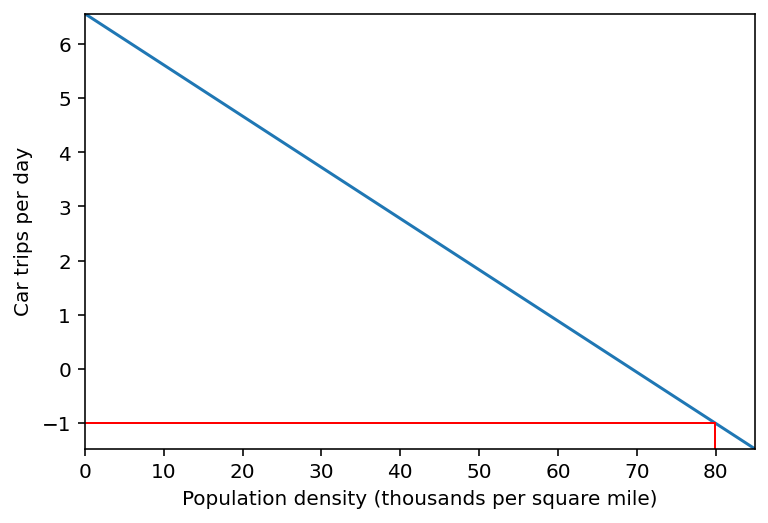

In [10]:
maxX = -(fit.params.const  + 1) / fit.params.HBPPOPDN

xs = np.linspace(0, maxX + 5, 2)
ys = fit.params.const + fit.params.HBPPOPDN * xs
plt.plot(xs, ys)
plt.xlim(np.min(xs), np.max(xs))
plt.ylim(np.min(ys), np.max(ys))
plt.xlabel('Population density (thousands per square mile)')
plt.ylabel('Car trips per day')

plt.savefig('../fig/lincarown.pdf', bbox_inches='tight')

xat15 = (-1 - fit.params.const) / fit.params.HBPPOPDN

plt.plot([0, xat15], [-1, -1], color='red', lw=1)
plt.plot([xat15, xat15], [-10, -1], color='red', lw=1)

plt.savefig('../fig/lincarown_neg.pdf', bbox_inches='tight')


In [11]:
pois = sm.Poisson(hh17.nCarTrips, sm.add_constant(hh17[['HBPPOPDN']] / 1000))
pfit = pois.fit()
pfit.summary()

Optimization terminated successfully.
         Current function value: 3.850599
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:              nCarTrips   No. Observations:               125320
Model:                        Poisson   Df Residuals:                   125318
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                0.006342
Time:                        14:47:13   Log-Likelihood:            -4.8256e+05
converged:                       True   LL-Null:                   -4.8564e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8866      0.001   1343.347      0.000       1.884       1.889
HBPPOPDN      -0.0173      0.000    -75.346      0.000      -0.018      -0.017
==============================================================================
"""

In [12]:
print(pd.DataFrame({'Coefficient': pfit.params, 'Incidence rate ratio': np.exp(pfit.params), 'Std. err.': pfit.bse, 'p-value': pfit.pvalues}).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Coefficient &  Incidence rate ratio &  Std. err. &  p-value \\
\midrule
const    &     1.886631 &              6.597107 &   0.001404 &      0.0 \\
HBPPOPDN &    -0.017276 &              0.982873 &   0.000229 &      0.0 \\
\bottomrule
\end{tabular}



In [13]:
# make an image of the probability
xs = np.arange(0, 80000, 10)
ys = np.arange(0, 8)
prb = np.zeros((len(xs), len(ys)))

expectations = np.exp(pfit.params.const + pfit.params.HBPPOPDN * (xs / 1000))

for y in ys:
    # Cameron and Trivedi, page 10
    prb[:,y] = np.exp(-expectations) * (expectations ** y) / math.factorial(y)

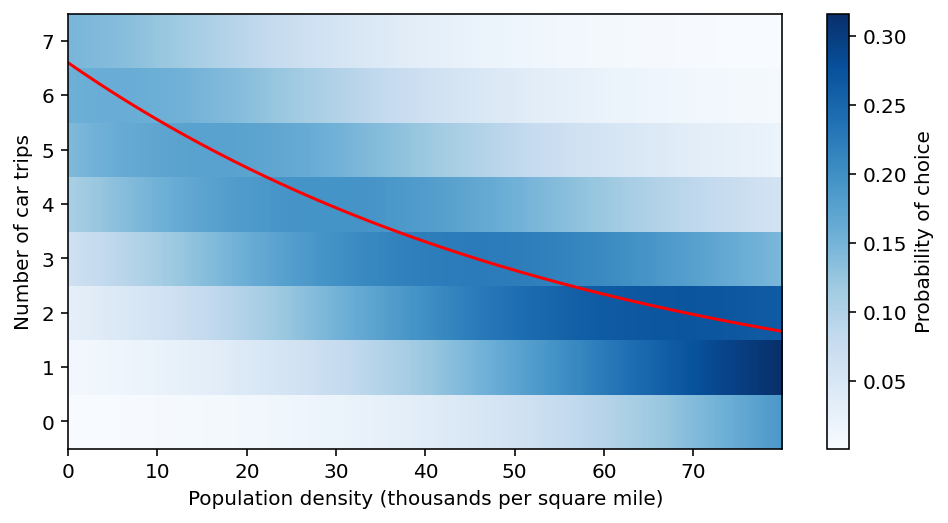

In [14]:
plt.figure(figsize=(8, 4))
plt.imshow(prb.T, aspect='auto', cmap='Blues', origin='lower', label='Probability of choice', interpolation='none')
plt.colorbar(label='Probability of choice')
plt.plot(np.arange(len(expectations)), expectations, color='red')
plt.xticks(np.arange(0, 7001, 1000), np.arange(0, 71, 10))
plt.xlabel('Population density (thousands per square mile)')
plt.ylabel('Number of car trips')
plt.savefig('../fig/poisson.pdf')

In [15]:
nb = sm.NegativeBinomial(hh17.nCarTrips, sm.add_constant(hh17[['HBPPOPDN']] / 1000))
nbfit = nb.fit()
nbfit.summary()

Optimization terminated successfully.
         Current function value: 2.872034
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:              nCarTrips   No. Observations:               125320
Model:               NegativeBinomial   Df Residuals:                   125318
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                0.001911
Time:                        14:47:15   Log-Likelihood:            -3.5992e+05
converged:                       True   LL-Null:                   -3.6061e+05
Covariance Type:            nonrobust   LLR p-value:                1.077e-301
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8927      0.003    582.498      0.000       1.886       1.899
HBPPOPDN      -0.0189      0.000    -38.001      0.000      -0.020      -0.018
alpha          0.6747      0.004    185.310      0.000       0.668       0.682
==============================================================================
"""

In [16]:
print(pd.DataFrame({'Coefficient': nbfit.params, 'Incidence rate ratio': np.exp(nbfit.params), 'Std. err.': nbfit.bse, 'p-value': nbfit.pvalues}).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Coefficient &  Incidence rate ratio &  Std. err. &  p-value \\
\midrule
const    &     1.892705 &              6.637300 &   0.003249 &      0.0 \\
HBPPOPDN &    -0.018864 &              0.981313 &   0.000496 &      0.0 \\
alpha    &     0.674736 &              1.963515 &   0.003641 &      0.0 \\
\bottomrule
\end{tabular}



In [17]:
# make an image of the probability
xs = np.arange(0, 80000, 10)
ys = np.arange(0, 8)
nbprb = np.zeros((len(xs), len(ys)))

nbexpectations = np.exp(nbfit.params.const + nbfit.params.HBPPOPDN * (xs / 1000))
alpha = nbfit.params.alpha

for y in ys:
    # Cameron and Trivedi, page 71
    # sure am glad I'm not the poor person who had to figure this out
    nbprb[:,y] = scipy.special.gamma(y + 1/alpha) / (scipy.special.gamma(y + 1) * scipy.special.gamma(1/alpha)) *\
        (((1/alpha) / (1/alpha + nbexpectations)) ** (1/alpha)) *\
        ((nbexpectations / (1/alpha + nbexpectations)) ** y)

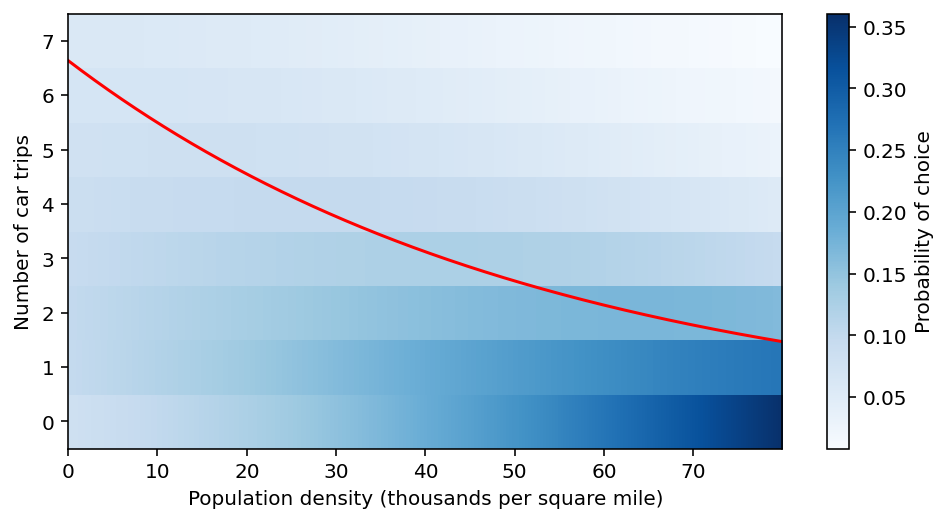

In [18]:
plt.figure(figsize=(8, 4))
plt.imshow(nbprb.T, aspect='auto', cmap='Blues', origin='lower', label='Probability of choice', interpolation='none')
plt.colorbar(label='Probability of choice')
plt.plot(np.arange(len(nbexpectations)), nbexpectations, color='red')
plt.xticks(np.arange(0, 7001, 1000), np.arange(0, 71, 10))
plt.xlabel('Population density (thousands per square mile)')
plt.ylabel('Number of car trips')
plt.savefig('../fig/negbin.pdf')

In [19]:
hh17['noDriver'] = (hh17.DRVRCNT == 0).astype('float64')
zinb = sm.ZeroInflatedNegativeBinomialP(hh17.nCarTrips, exog=sm.add_constant(hh17[['HBPPOPDN']] / 1000), exog_infl=sm.add_constant(hh17[['noDriver']]))
zinbfit = zinb.fit()
zinbfit.summary()

Optimization terminated successfully.
         Current function value: 2.792372
         Iterations: 22
         Function evaluations: 28
         Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                         nCarTrips   No. Observations:               125320
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                   125318
Method:                                      MLE   Df Model:                            1
Date:                           Thu, 27 Aug 2020   Pseudo R-squ.:                 0.01240
Time:                                   14:47:30   Log-Likelihood:            -3.4994e+05
converged:                                  True   LL-Null:                   -3.5433e+05
Covariance Type:                       nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
inflate_const       -2.2399      0.012   -187.771      0.000      -2.263      -2.217
inflate_noDriver     3.2199      0.037     88.112      0.000       3.148       3.292
const                1.9856      0.003    716.391      0.000       1.980       1.991
HBPPOPDN            -0.0105      0.000    -22.873      0.000      -0.011      -0.010
alpha                0.3548      0.003    140.104      0.000       0.350       0.360
====================================================================================
"""

In [20]:
print(pd.DataFrame({'Coefficient': zinbfit.params, 'Incidence rate ratio': np.exp(zinbfit.params), 'Std. err.': zinbfit.bse, 'p-value': zinbfit.pvalues}).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Coefficient &  Incidence rate ratio &  Std. err. &        p-value \\
\midrule
inflate\_const    &    -2.239922 &              0.106467 &   0.011929 &   0.000000e+00 \\
inflate\_noDriver &     3.219895 &             25.025499 &   0.036543 &   0.000000e+00 \\
const            &     1.985556 &              7.283095 &   0.002772 &   0.000000e+00 \\
HBPPOPDN         &    -0.010485 &              0.989570 &   0.000458 &  8.604834e-116 \\
alpha            &     0.354818 &              1.425921 &   0.002533 &   0.000000e+00 \\
\bottomrule
\end{tabular}



In [21]:
# make an image of the probability
xs = np.arange(0, 80000, 10)
ys = np.arange(0, 8)

countExpectations = np.exp(zinbfit.params.const + zinbfit.params.HBPPOPDN * (xs / 1000))
driverStructuralZeroProb = np.exp(zinbfit.params.inflate_const) / (np.exp(zinbfit.params.inflate_const) + 1)
noDriverStructuralZeroProb = np.exp(zinbfit.params.inflate_const + zinbfit.params.inflate_noDriver) / (np.exp(zinbfit.params.inflate_const + zinbfit.params.inflate_noDriver) + 1)

driverExpectations = countExpectations * (1 - driverStructuralZeroProb)
noDriverExpectations = countExpectations * (1 - noDriverStructuralZeroProb)

zinbprb_driver = np.zeros((len(xs), len(ys)))
zinbprb_nodriver = np.zeros((len(xs), len(ys)))


alpha = zinbfit.params.alpha

for y in ys:
    # Cameron and Trivedi, page 71
    # sure am glad I'm not the poor person who had to figure this out
    countProbs = scipy.special.gamma(y + 1/alpha) / (scipy.special.gamma(y + 1) * scipy.special.gamma(1/alpha)) *\
        (((1/alpha) / (1/alpha + countExpectations)) ** (1/alpha)) *\
        ((countExpectations / (1/alpha + countExpectations)) ** y)
    
    if y == 0:
        zinbprb_driver[:,y] = countProbs * (1 - driverStructuralZeroProb) + driverStructuralZeroProb
        zinbprb_nodriver[:,y] = countProbs * (1 - noDriverStructuralZeroProb) + noDriverStructuralZeroProb

    else:
        zinbprb_driver[:,y] = countProbs * (1 - driverStructuralZeroProb)
        zinbprb_nodriver[:,y] = countProbs * (1 - noDriverStructuralZeroProb)

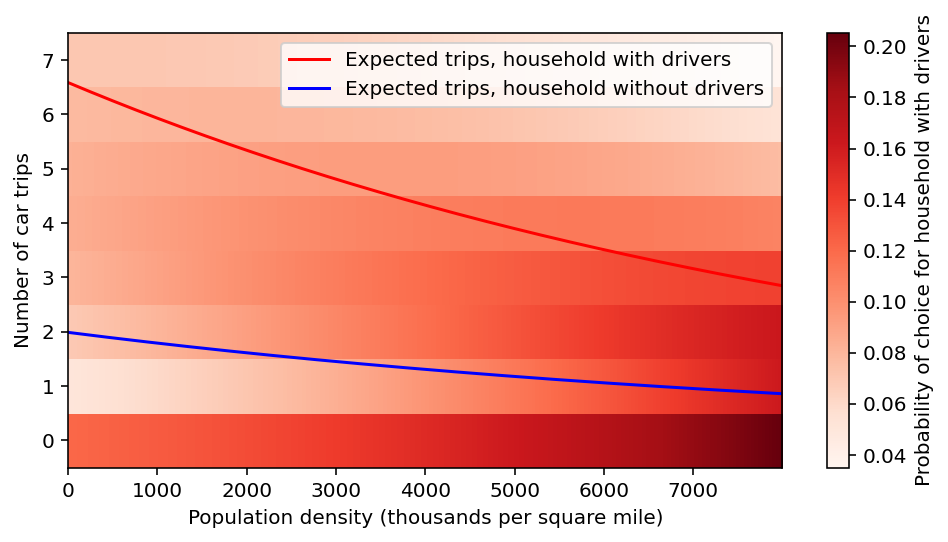

In [22]:
plt.figure(figsize=(8, 4))

plt.imshow(zinbprb_driver.T, aspect='auto', cmap='Reds', origin='lower', label='Probability of choice', interpolation='none')
plt.colorbar(label='Probability of choice for household with drivers')

plt.plot(np.arange(len(driverExpectations)), driverExpectations, color='red', label='Expected trips, household with drivers')
plt.plot(np.arange(len(noDriverExpectations)), noDriverExpectations, color='blue', label='Expected trips, household without drivers')
plt.legend()

plt.xlabel('Population density (thousands per square mile)')
plt.ylabel('Number of car trips')
plt.savefig('../fig/zinb_driver.pdf')

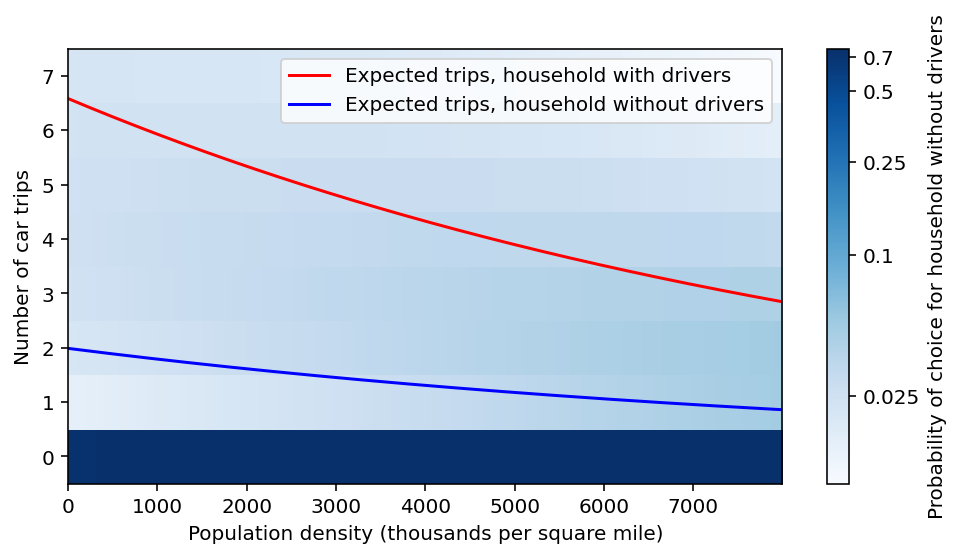

In [23]:
plt.figure(figsize=(8, 4))

plt.imshow(np.log(zinbprb_nodriver.T), aspect='auto', cmap='Blues', origin='lower', label='Probability of choice', interpolation='none')
cbar = plt.colorbar(label='Probability of choice for household without drivers')
cbar.set_ticks(np.log(np.array([0.025, 0.1, 0.25, 0.5, 0.7])))
cbar.ax.set_yticklabels([0.025, 0.1, 0.25, 0.5, 0.7])

plt.plot(np.arange(len(driverExpectations)), driverExpectations, color='red', label='Expected trips, household with drivers')
plt.plot(np.arange(len(noDriverExpectations)), noDriverExpectations, color='blue', label='Expected trips, household without drivers')
plt.legend()

plt.xlabel('Population density (thousands per square mile)')
plt.ylabel('Number of car trips')
plt.savefig('../fig/zinb_nodriver.pdf')